In [40]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/subset_MIN_ICE_1m_20020101_20031231.nc']


In [41]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]



Dsopt=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_desorption_rate.nc')



minice=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_ice_y2002m09.nc')
minice=minice.variables['ileadfra'][:]

minice_=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/Cryosphere2d_ANHA4-EXH001_icemod_y2001m09.nc')
minice_=minice_.variables['ileadfra'][:]

In [42]:
nasa=nc.Dataset('/ocean/xiaoxiny/research/\
data/findk/ice_concentration/seaice_conc_monthly_nh_f13_200209_v02r00.nc')

In [43]:
print nasa.variables
nasa_lat=nasa.variables['latitude'][:]
nasa_lon=nasa.variables['longitude'][:]
nasa_ice=nasa.variables['seaice_conc_monthly_cdr'][:]
print nasa_ice.shape,nasa_lat.min(),nasa_lat.max()

OrderedDict([(u'projection', <netCDF4.Variable object at 0x7f79fdccda68>), (u'seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f79fdccd5a8>), (u'stdev_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f79fdccd640>), (u'melt_onset_day_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f79fdccdc30>), (u'qa_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f79fdccdb00>), (u'goddard_merged_seaice_conc_monthly', <netCDF4.Variable object at 0x7f79fdccdcc8>), (u'goddard_nt_seaice_conc_monthly', <netCDF4.Variable object at 0x7f79fdccdd60>), (u'goddard_bt_seaice_conc_monthly', <netCDF4.Variable object at 0x7f79fdccd0e8>), (u'time', <netCDF4.Variable object at 0x7f79fdccd938>), (u'ygrid', <netCDF4.Variable object at 0x7f79fdcd8218>), (u'xgrid', <netCDF4.Variable object at 0x7f79fdcd83e0>), (u'latitude', <netCDF4.Variable object at 0x7f79fdcd80e8>), (u'longitude', <netCDF4.Variable object at 0x7f79fdcd85a8>)])
(1, 448, 304) 31.1026717524 89.8368159996


In [44]:
Susan_lon=[-109,0.,-150,0]
Susan_lat=[86,80,75,87]

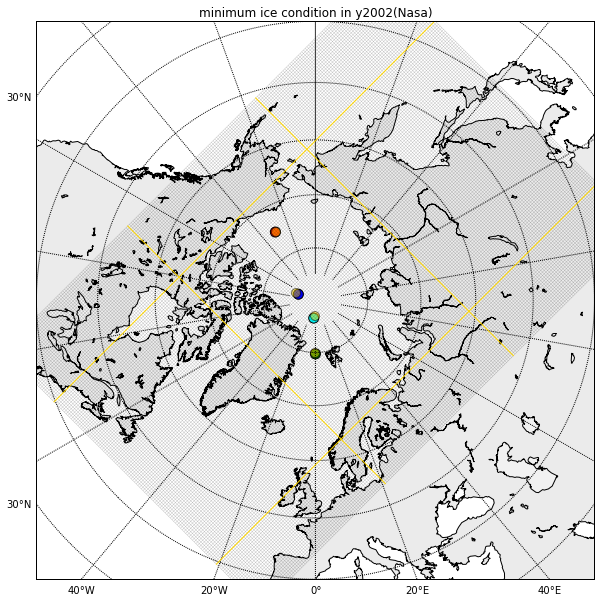

In [45]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)
x,y = m(nasa_lon,nasa_lat)
#m.pcolor(x,y,nasa_ice[0,:,:],vmin=0.,vmax=1.05);m.colorbar()
plt.plot(x[::2,::2],y[::2,::2],x[::2,::2].T,y[::2,::2].T,color='k',lw=0.1)

plt.plot(x[150,::2],y[150,::2],color='gold',lw=1)
plt.plot(x[300,::2],y[300,::2],color='gold',lw=1)
plt.plot(x[::2,60],y[::2,60],color='gold',lw=1)
plt.plot(x[::2,250],y[::2,250],color='gold',lw=1)

a=[217,240,265,245]
b=[90,140,185,163]
col=['red','blue','green','cyan']
m.scatter(x[a,b],y[a,b],c=col,s=100)

#x_lon,y_lat = m(lon,lat)
#plt.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='cyan',lw=0.1)
#plt.plot(x_lon[80,::2],y_lat[80,::2],color='cyan',lw=1)
#m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)

s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=80,alpha=0.5)

plt.title('minimum ice condition in y2002(Nasa)')

In [46]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/NASA_ice/*09_*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198709_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198809_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199009_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199109_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f11_199209_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f11_199309_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f11_199409_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f11_199509_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f13_199609_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f13_199709_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f13_199809_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f13_199909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly

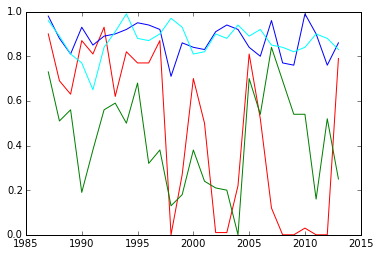

In [24]:
#the GSFC NASA Team algorithm
ice_series=[]
t=[]
for i in range (27):
    nasa=nc.Dataset(nc_filename[i])
    nasa_ice=nasa.variables['goddard_nt_seaice_conc_monthly'][0,a,b] 
    t.append(i+1987)
    ice_series.append(nasa_ice)


a=[217,240,265,240]
b=[90,140,185,160]

for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])

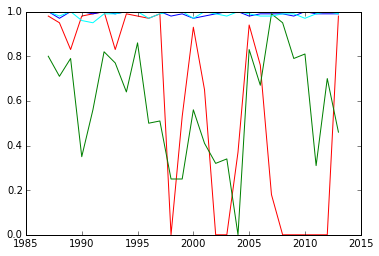

In [47]:
#a merged version of the GSFC NASA Team algorithm and the GSFC Bootstrap sea ice concentrations
ice_series=[]
t=[]
for i in range (27):
    nasa=nc.Dataset(nc_filename[i])
    nasa_ice=nasa.variables['goddard_merged_seaice_conc_monthly'][0,a,b] 
    t.append(i+1987)
    ice_series.append(nasa_ice)

a=[217,240,265,240]
b=[90,140,185,160]

for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])

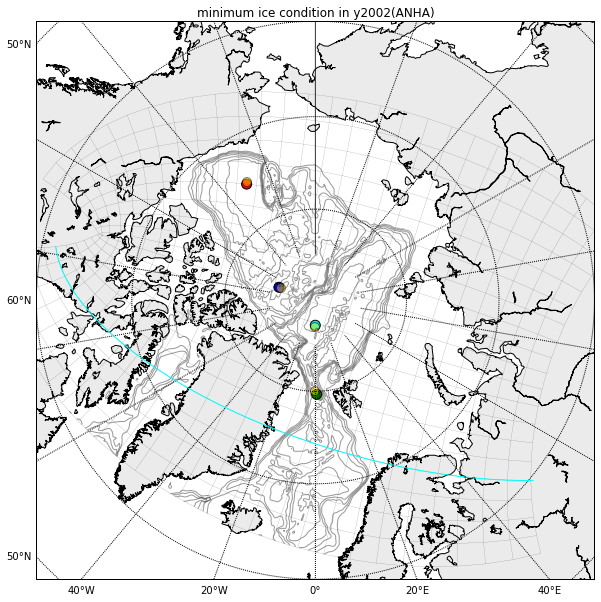

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)


x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
plt.plot(x_lon[80,::2],y_lat[80,::2],color='cyan',lw=1)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)

a=[300,205,119,178]
b=[210,265,335,312]
col=['red','blue','green','cyan']
m.scatter(x_lon[a,b],y_lat[a,b],c=col,s=100)

s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=80,alpha=0.5)

plt.title('minimum ice condition in y2002(ANHA)')

In [28]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/ANHA4_ENG_ice/*09.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1983m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1984m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1985m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1986m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1987m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1988m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1989m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1990m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1991m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1992m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1993m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1994m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1995m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1996m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1997m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4

In [29]:
a=[700,605,519,578]
b=[210,265,335,312]
ice_series=[]
t=[]
for i in range (len(nc_filename)):
    anha=nc.Dataset(nc_filename[i])
    anha_ice=anha.variables['ileadfra']
    t.append(i+1983)
    ice_series.append(anha_ice[0,a,b])

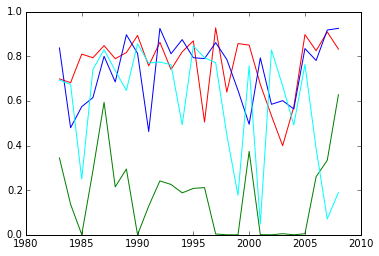

In [30]:
#ANHA
for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])